### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [361]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
from scipy import stats

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [98]:
data = pd.read_csv('data/coupons.csv')

In [99]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
#Find number of rows and columns in the dataset
data.shape

(12684, 26)

In [5]:
#Explore the type of data in each column
#data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Examine columns with na values

In [6]:
#Find columns that have Nan values
data.isna().any()

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
car                      True
Bar                      True
CoffeeHouse              True
CarryAway                True
RestaurantLessThan20     True
Restaurant20To50         True
toCoupon_GEQ5min        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool

In [7]:
#data.car.unique()
data.car.value_counts(dropna= False)

NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: car, dtype: int64

In [8]:
#data.Bar.unique()
data.Bar.value_counts(dropna= False)

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: Bar, dtype: int64

In [9]:
#data.CoffeeHouse.unique()
data.CoffeeHouse.value_counts(dropna= False)

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: CoffeeHouse, dtype: int64

In [10]:
#data.CarryAway.unique()
data.CarryAway.value_counts(dropna= False)

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: CarryAway, dtype: int64

In [11]:
#data.RestaurantLessThan20.unique()
data.RestaurantLessThan20.value_counts(dropna= False)

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
NaN       130
Name: RestaurantLessThan20, dtype: int64

In [12]:
#data.Restaurant20To50.unique()
data.Restaurant20To50.value_counts(dropna= False)

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
NaN       189
Name: Restaurant20To50, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

We saw from above that most of the values (12,517) in the "car" column contains missing data. We can drop thiscolumn as it does not provide us any additional value because of so many missing values.

In [100]:
# Drop 'car' column
data.drop("car", axis = 1,inplace=True)
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


For rest of the columns, we will replace na values with "never". We will make this assumption for our analysis as these values make up a very small proportion of the total rows of data available. Alternatively, we could have imputed the values using the mean for each column.

In [108]:
#Fill 'never' for all na values in other columns - Very conservative approach
for col in ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']:
    data[col]= data[col].fillna("never")
    #print(data[col].isna().any())

4. What proportion of the total observations chose to accept the coupon? 



In [360]:
#Compute proportion/total acceptance rate
data['Y'].value_counts(normalize=True)

1    0.568433
0    0.431567
Name: Y, dtype: float64

We see that 56.84% of observations chose to accept the coupon.

5. Use a bar plot to visualize the `coupon` column.

In [369]:
#Create bar graph using plotly
fig = px.bar(data['coupon'].value_counts(), x="coupon", color= "coupon",
             barmode='group', title = "Count of Coupons by Type", height=400,
             labels = dict(index = "Coupon Type", coupon="Count"))
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [366]:
#Alternate method for box plot using pandas plot
#data['coupon'].value_counts().plot(kind="bar")

6. Use a histogram to visualize the temperature column.

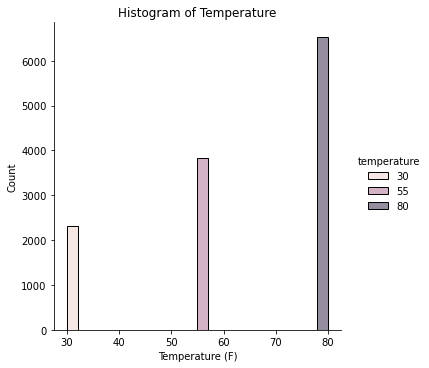

In [370]:
#Create Histogram using Seaborn
sns.displot(data,x = "temperature", kde=True, hue ="temperature")
plt.title('Histogram of Temperature')
plt.xlabel('Temperature (F)')
plt.savefig('images/temperatureHist.jpg')

In [78]:
data.value_counts('Y')
data1 = data[['temperature','Y']].groupby("temperature").sum()/ data[['temperature','Y']].groupby("temperature").count()
data1 = data1.reset_index()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [109]:
barData = data.query("coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


In [110]:
barData['Y'].value_counts(normalize=True)

0    0.589985
1    0.410015
Name: Y, dtype: float64

59% of bar coupons were accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [146]:
#Rate for people who went to bar 3 or less times
barData.query("Bar != '4~8' & Bar != 'gt8'")['Y'].value_counts(normalize=True)

0    0.629263
1    0.370737
Name: Y, dtype: float64

In [145]:
#Rate for people who went to bar more than 3 times
barData.query("Bar == '4~8' | Bar == 'gt8'")['Y'].value_counts(normalize=True)

1    0.768844
0    0.231156
Name: Y, dtype: float64

We see that only 37.07% of coupon acceptance rate for people who go to bar 3 times or less( includes those who don't go to bars).
Whereas the coupon acceptance rate for people who go to bar more than 3 times is 76.88%.

In [147]:
#Check numerator by Bar values
#barData[['Bar','Y']].groupby('Bar').sum('Y')

In [148]:
#Check denominator by Bar values
#barData[['Bar','Y']].groupby('Bar').count()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [352]:
#Create the other group first
barData.loc[((barData['Bar'].isin(['never','less1'])) | (barData['age'].isin(['below21','21']))),"over25Visit1Plus"] = 0

C:\Users\surab\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [353]:
#Fill 1 for the over 25 going to bar more than once group
barData['over25Visit1Plus'].fillna(1, inplace=True)

C:\Users\surab\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [237]:
#barData[['age','Bar','over25Visit1Plus']].query("over25Visit1Plus.isna()" , engine='python')
#barData[['age','Bar','over25Visit1Plus']].tail(50)

In [254]:
#Check Numerator
#barData.groupby(['Bar','age']).sum('Y')['Y']   #Before creation of new column
barData.groupby(['over25Visit1Plus']).sum('Y')['Y']

over25Visit1Plus
0.0    535
1.0    292
Name: Y, dtype: int64

In [253]:
#Check Denominator
#barData.groupby(['Bar','age']).count()['Y']      #Before creation of new column
barData.groupby(['over25Visit1Plus']).count()['Y']

over25Visit1Plus
0.0    1597
1.0     420
Name: Y, dtype: int64

In [243]:
barData.groupby(['over25Visit1Plus']).sum('Y')['Y']/barData.groupby(['over25Visit1Plus']).count()['Y']

over25Visit1Plus
0.0    0.335003
1.0    0.695238
Name: Y, dtype: float64

In [244]:
#Method 2 to get the same result using value count

In [245]:
#barData.query('over25Visit1Plus == 1')['Y'].value_counts(normalize=True)

In [247]:
#barData.query('over25Visit1Plus == 0')['Y'].value_counts(normalize=True)

We see that the acceptance rate for the said population( i.e. over 25 and who go to a bar more than once)is 69.52% whereas the acceptance rate for rest of the observations is only 33.50%.

5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers. 

In order to construct my hypothesis, I will first examine the distributions using a violin plot.

In [355]:
px.violin(barData, x='over25Visit1Plus', y='Y', color = 'over25Visit1Plus',
         title = 'Distribution by specified population', height = 400,
         labels = dict(Y = 'Acceptance Rate',over25Visit1Plus = "Age > 25 & Bar Visits > 1"))

From the graph above, we can see the sample for 25 who go to the bar more than once are more likely to accept the bar coupon. So we could use t-test to see if the means for the two populations are the same. However, acceptance and rejection for the two groups can be better compared using proportions test (Chi squared) for the two samples.

We will do a two tailed test:
    H0: The acceptance rates for the two groups are the same (P1 - P0 = 0)  ---> Null
    HA: The acceptance rates of the two groups are different (P1 - P0 != 0) ---> Alternative

6. Using alpha at 0.05 test your hypothesis and state your conclusion.

In [285]:
#Create contingency table
chiData = pd.DataFrame(barData.groupby(['over25Visit1Plus']).sum('Y')['Y'])
chiData.rename(columns = {'Y' : 'Accepted_Coupon'}, inplace = True)
chiData['Rejected_Coupon']=barData.groupby(['over25Visit1Plus']).count()['Y']-barData.groupby(['over25Visit1Plus']).sum('Y')['Y']
chiData

,Accepted_Coupon,Rejected_Coupon
over25Visit1Plus,,
0.0,535,1062
1.0,292,128


In [287]:
contingencyTable = np.array([[535,1062],[292,128]])
stats.chi2_contingency(contingencyTable)

(176.9075717681654,
 2.2943230944781008e-40,
 1,
 array([[654.7937531, 942.2062469],
        [172.2062469, 247.7937531]]))

The second value in the output is the p value (2.39e-40). This is way lower than our alpha (significance level of 0.05) and for two tailed  it is 0.05/2 = 0.025. The p-value is still lower and we can reject our null hypothesis for the alternate.
We can say that people over 25 who visit bars more than once are more likely to accept the coupons.

Also, doing a t-test.
First, we'll compute the standard deviation, which is the square root of the variance to see if we can assume equal variance if it's close enough.

In [294]:
#Compute std to see if we can assume equal variance
barData['over25Visit1Plus'].std()

0.4061429231654133

In [295]:
#Compute std to see if we can assume equal variance
barData['Y'].std()

0.4919579945782544

In [293]:
result = stats.ttest_ind(barData['over25Visit1Plus'], barData['Y'], equal_var=True) #assume equal variance
result

Ttest_indResult(statistic=-14.205539484928604, pvalue=9.988386998617304e-45)

Also, using the t-test we can see the p-value even for a two tailed test is lower than our alpha. We can reject the null hypothesis.

7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [371]:
#Find all unique values in the below column
#barData['passanger'].unique()

In [372]:
#Find all unique values in the below column
#barData['occupation'].unique()

In [301]:
#Create the other group first and flag it as 0
barData.loc[((barData['Bar'].isin(['never','less1'])) | (barData['passanger'].str.contains('Kid')) | (barData['occupation'] == 'Farming Fishing & Forestry')),"nonAgriNonKidBarFreqFlag"] = 0

C:\Users\surab\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\surab\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [302]:
#Flag 1 for those who have no kid passengers, go to bar more than once and don't work in agriculture(3 Fs) industry
barData['nonAgriNonKidBarFreqFlag'].fillna(1, inplace=True)

C:\Users\surab\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [373]:
#Check to see the 0 and 1 correwctly and see how many of each exist
#barData['nonAgriNonKidBarFreqFlag'].value_counts()

In [304]:
#Compute rates for the two sets
barData.groupby(['nonAgriNonKidBarFreqFlag']).sum('Y')['Y']/barData.groupby(['nonAgriNonKidBarFreqFlag']).count()['Y']

nonAgriNonKidBarFreqFlag
0.0    0.296044
1.0    0.713249
Name: Y, dtype: float64

The bar coupon acceptance rate for the group with no kid passengers, go to bars more than once and work in an industry other than Farming, Fishing and Forestry is 71.32%. The acceptance rest of bar coupons for all others is 29.6%.

8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Let's call the above three: groupA, groupB and groupC respectively. We will flag observations as 1 and 0 for each of the groups respectively. We will create a new column groupOverall which will be 1 if either groupA or groupB or groupC is 1 (i.e. they belong to either A or B or C)

In [374]:
#Find all unique values in the below column
#barData['maritalStatus'].unique()

In [307]:
#Flag first condition - groupA
#First flag 0 for those who do not satisfy the condition
barData.loc[((barData['Bar'].isin(['never','less1'])) | (barData['passanger'].str.contains('Kid')) | (barData['maritalStatus'] == 'Widowed')),"groupA"] = 0

In [308]:
#Flag 1 for the rest (those who satisfy the condition)
barData['groupA'].fillna(1, inplace=True)

In [375]:
#Check to see the 0 and 1 correwctly and see how many of each exist
#barData['groupA'].value_counts()

In [310]:
#Compute rates for the group A
barData.groupby(['groupA']).sum('Y')['Y']/barData.groupby(['groupA']).count()['Y']

groupA
0.0    0.296044
1.0    0.713249
Name: Y, dtype: float64

The bar coupon acceptance rate for drivers who go to bar more than once,had passengers who were not kids and were not widowed is 71.32%.

In [376]:
#Check all values that exist for age
#barData['age'].value_counts()

In [377]:
#Flag second condition - groupB
#First flag 0 for those who do not satisfy the condition
barData.loc[(barData['Bar'].isin(['never','less1'])) | (barData['age'].isin(['31','36','41','46','50plus'])),"groupB"] = 0

C:\Users\surab\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [316]:
#Flag 1 for the rest (those who satisfy the condition)
barData['groupB'].fillna(1, inplace=True)

In [378]:
#Check to see the 0 and 1 correwctly and see how many of each exist
#barData['groupB'].value_counts()

In [318]:
#Compute rates for the group B
barData.groupby(['groupB']).sum('Y')['Y']/barData.groupby(['groupB']).count()['Y']

groupB
0.0    0.345694
1.0    0.721739
Name: Y, dtype: float64

The bar coupon acceptance rate for drivers who go to bar more than once and are under the age of 30 is 72.17%.

In [379]:
#Check what values exist in 'income'
#barData['income'].value_counts()

In [380]:
#Check what values exist in 'RestaurantLessThan20'
#barData['RestaurantLessThan20'].value_counts()

In [321]:
#Flag third condition - groupC
#First flag 1 for those who do satisfy the condition
barData.loc[(barData['RestaurantLessThan20'].isin(['4~8','gt8'])) & (barData['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999'])),"groupC"] = 1

In [322]:
#Flag 0 for the rest (those who do not satisfy the condition)
barData['groupC'].fillna(0, inplace=True)

In [381]:
#Check to see the 0 and 1 correctly and see how many of each exist
#barData['groupC'].value_counts()

In [324]:
#Compute rates for the group B
barData.groupby(['groupC']).sum('Y')['Y']/barData.groupby(['groupC']).count()['Y']

groupC
0.0    0.401076
1.0    0.453488
Name: Y, dtype: float64

The bar coupon acceptance rate for drivers who go to cheap restaurant more than 4 times and earn less than 50k is 45.34%

In [325]:
#groupOverall - Flag 1 if the driver meets any one of the three groups (1 if any one of groupA or groupB or groupC is 1; else 0)
barData.loc[(barData['groupA'] == 1) | (barData['groupB'] == 1) | (barData['groupC'] == 1),"groupOverall"] = 1

In [326]:
#Flag 0 for the rest (those who do not satisfy the condition)
barData['groupOverall'].fillna(0, inplace=True)

In [327]:
#Check to see the 0 and 1 correctly and see how many of each exist
#barData['groupOverall'].value_counts()

0.0    1241
1.0     776
Name: groupOverall, dtype: int64

In [331]:
#Compute rates for the group B
barData.groupby(['groupOverall']).sum('Y')['Y']/barData.groupby(['groupOverall']).count()['Y']

groupOverall
0.0    0.298147
1.0    0.588918
Name: Y, dtype: float64

The bar coupon acceptance rate for drivers who go to bar more than once, have no kid passengers and are not widowed or who go to bar more than once and are under 30 or who eat at cheap restaurants more than 4 times and earn less than 50k is 58.89%.

# 9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

We can say that drivers who are younger(under 30), frequent bars( more than once), don't drive with kids, earn less than 50k but frequent cheap restaurants(more than 4 times) are more likely to accept bar coupons than rest of the drivers.
H0: The mean bar coupon acceptance rate for this group and the rest of the drivers is the same  ---> Null Hypothesis


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Examine the role of temperature in coupon issuance and acceptance rate

In [385]:
#Look at correaltion matrix for numerical fields
data.corr()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.019716,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.078211,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,NaN,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,NaN,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,NaN,0.303533,0.192319,-1.000000,1.000000,-0.014570
Y,0.061240,-0.045557,NaN,-0.081602,-0.103633,0.014570,-0.014570,1.000000


There is a strong positive correlation between temperature and Y (coupon acceptance)

In [340]:
px.histogram(data, x= "temperature", color="coupon", barmode="group", title ="Coupon Types by Temperature")

We see more coupons are distributed when temperature is warmer (80 F). There are way more coffee coupons when temperature is high.

In [341]:
data.value_counts('Y')
data1 = data[['temperature','Y']].groupby("temperature").sum()/ data[['temperature','Y']].groupby("temperature").count()
data1 = data1.reset_index()

In [342]:
data1['tempText'] = data1['temperature'].astype('string')
fig = px.bar(data1, x = "temperature", y = 'Y', color="tempText",
       title = "Coupon Acceptance Rate by Temperature", height=400,
             labels = dict(Y = "Coupon Acceptance Rate", temperature = "Temperature (F)"))
fig.update_layout(
    legend_title="Temperature (F)"
    )
fig.show()

We also see the coupon acceptance rate increases with temperature. 

# Determine the characteristics of drivers for coffeee coupons

Since, we saw coffee coupons were highly present in our dataset, let's examine it.

In [343]:
#Subset coffe coupon data
coffeeData = data.query("coupon == 'Coffee House'")

In [344]:
coffeeData['Y'].value_counts(normalize=True)

0    0.500751
1    0.499249
Name: Y, dtype: float64

Overall, about 50% accepted the coffee coupons.

In [346]:
coffeeData['CoffeeHouse'].value_counts()

less1    1075
1~3      1042
never     999
4~8       538
gt8       342
Name: CoffeeHouse, dtype: int64

1. Let's examine if heavy coffee drinkers (4+ times) accepted the coupons more

In [347]:
#Rate for people who went to coffe house 4 or more times
coffeeData.query("CoffeeHouse == '4~8' | CoffeeHouse == 'gt8'")['Y'].value_counts(normalize=True)

1    0.675
0    0.325
Name: Y, dtype: float64

In [349]:
#Rate for people who went to coffee house 3 or less times
coffeeData.query("CoffeeHouse != '4~8' & CoffeeHouse != 'gt8'")['Y'].value_counts(normalize=True)

0    0.550385
1    0.449615
Name: Y, dtype: float64

We can see from above the heavy coffee house visitors accepted the coupon 67.5% whereas the light/non coffee drinkers only accepted the coupon 44.96% of the times.

2. Let's determine the age and gender's effect on the coffee coupon acceptance rate next

In [351]:
#Compute rates by gender only
barData.groupby(['gender']).sum('Y')['Y']/barData.groupby(['gender']).count()['Y']

gender
Female    0.340670
Male      0.484568
Name: Y, dtype: float64

The acceptance rate for males is 48.46% whereas for females it is 34.06%.

In [356]:
#Cretae flag=1 for over30
coffeeData.loc[coffeeData['age'].isin(['31','36','41','46','50plus']),"over30"] = 1

C:\Users\surab\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [357]:
#Rest of them are under thirty so flag=0
coffeeData['over30'].fillna(0, inplace=True)

In [359]:
#Compute rates by over30 field
coffeeData.groupby(['over30']).sum('Y')['Y']/coffeeData.groupby(['over30']).count()['Y']

over30
0.0    0.534290
1.0    0.468085
Name: Y, dtype: float64

Acceptance rate for people over 30 is 46.81% whereas for those under 30 is 53.43%.

Now let's examine rates for under 30 males versus others

In [382]:
#Cretae flag=1 for maleUnder30
coffeeData.loc[(coffeeData['over30'] == 0) & (coffeeData['gender'] == 'Male'),"maleUnder30"] = 1

C:\Users\surab\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [383]:
#Rest of them are flagged 0
coffeeData['maleUnder30'].fillna(0, inplace=True)

C:\Users\surab\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [384]:
#Compute rates by maleUnder30 field
coffeeData.groupby(['maleUnder30']).sum('Y')['Y']/coffeeData.groupby(['maleUnder30']).count()['Y']

maleUnder30
0.0    0.487992
1.0    0.533066
Name: Y, dtype: float64

From this, we can say that males under 30 are more likely to accept coffee coupons(about 53% acceptance rate) compared to the rest (about 48% acceprtance rate).